# Speech Emotion Recoognition (SER)
Speech emotion recognition (SER) is the process of predicting human emotions from audio signals using artificial intelligence (AI) techniques. SER technologies have a wide range of applications in areas such as psychology, medicine, education, and entertainment. Extracting relevant features from audio signals is a crucial task in the SER process to correctly identify emotions. Several studies on SER have employed short-time features such as Mel frequency cepstral coefficients (MFCCs), due to their efficiency in capturing the periodic nature of audio signals.

## Introduction
Speech is the natural and widespread method of human communication and carries both paralinguistic and linguistic information. The linguistic information includes the context and language of the speech, while paralinguistic information includes the gender, emotions, age, and other unique attributes of the human. Several studies have shown that audio signals can be a simple mean to establish a connection between machines and humans.



## Python Library which is used in my project
- **Pandas -** Pandas is a software library written for the Python programming language for data manipulation and analysis.
- **Numpy -** Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **OS & SYS -** OS stands for the Operating System module in Python that allows the developers to interact with the operating system. The Sys Module helps us to interact with the Python runtime environment.
- **Librosa -** Librosa is a python package for music and audio analysis.
- **Seaborn -** Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.
- **Matplotlib -** Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- **Sklearn(scikit-learn) -** Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
- **Ipython -** IPython is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers introspection, rich media, shell syntax, tab completion, and history.
- **Keras -** Keras is an open-source library that provides a Python interface for artificial neural networks.

In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


# Data Processing 


In [6]:
#These contain address of the Database
Ravdess = "D:/Imp Files/Speech Emotion Recognition/Important Files or Data/Ravdess/"
Crema="D:/Imp Files/Speech Emotion Recognition/Important Files or Data/Crema-D/AudioWAV/"
Tess ="D:/Imp Files/Speech Emotion Recognition/Important Files or Data/Tess/TESS Toronto emotional speech set data/"
Savee ="D:/Imp Files/Speech Emotion Recognition/Important Files or Data/Savee/ALL/"

## Ravdess (Ryerson Audio-Visual Database of Emotional Speech and Song) DataSet
Speech audio-only files (16bit, 48kHz .wav) from the RAVDESS.<br>
This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.<br>
This contain many emotion :-
- Angry
- Neutral
- Calm
- Happy
- Sad
- Fear
- Disgust
- Surprised


Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

- Vocal channel (01 = speech, 02 = song).

- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

- Repetition (01 = 1st repetition, 02 = 2nd repetition).

- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

For Example "03-02-01-01-01-01-01.wav" now each part telling different thing-

- Audio-Only (03)
- Song (02)
- Neutral (01)
- Normal (01)
- "Kids are talking by the door" statement (01)
- 1st repetition (01)
- 1st actor (01)- Male (Odd number for male)


In [7]:
#This will extract all the dir in Ravdess location
ravdess_directory_list = os.listdir(Ravdess)

#Making list of emotion and path accondingly
file_emotion_ravdess = []
file_path_ravdess = []
#This is use for exessing the directory
for dir_1 in ravdess_directory_list:
  #It create an actor for each dir in Ravdess
  actor = os.listdir(Ravdess+ dir_1)
  for file in actor:
    #We extract the file name and spliting it to extract infomation from it
    #Here we remove .wav
    part = file.split('.')[0]
    #Here we split the data according to '-'
    part = part.split('-')

    #Here we append 2nd index inform from 03-02-01-01-01-01-01 [ file name ]
    file_emotion_ravdess.append(int(part[2]))
    #we append the file location of each file
    file_path_ravdess.append(Ravdess+ dir_1 +'/' +file)

#Create DataFrame of the emotion
emotion_df = pd.DataFrame(data =file_emotion_ravdess , columns =['Emotions'])
print(emotion_df)

#Create DataFrame of the path
path_df = pd.DataFrame(data=file_path_ravdess, columns =['Path'])
print(path_df)

Ravdess_df = pd.concat([emotion_df,path_df], axis= 1)
print(Ravdess_df)

#Changing integer to actual information
Ravdess_df.Emotions.replace({1 : 'neutral', 2 : 'calm', 3 :'happy', 4 : 'sad', 5 : 'angry', 6 : 'fear', 7 :'disgust', 8 : 'surprised'}, inplace = True)
Ravdess_df.head()


      Emotions
0            1
1            1
2            1
3            1
4            2
...        ...
1007         6
1008         6
1009         6
1010         6
1011         6

[1012 rows x 1 columns]
                                                   Path
0     D:/Imp Files/Speech Emotion Recognition/Import...
1     D:/Imp Files/Speech Emotion Recognition/Import...
2     D:/Imp Files/Speech Emotion Recognition/Import...
3     D:/Imp Files/Speech Emotion Recognition/Import...
4     D:/Imp Files/Speech Emotion Recognition/Import...
...                                                 ...
1007  D:/Imp Files/Speech Emotion Recognition/Import...
1008  D:/Imp Files/Speech Emotion Recognition/Import...
1009  D:/Imp Files/Speech Emotion Recognition/Import...
1010  D:/Imp Files/Speech Emotion Recognition/Import...
1011  D:/Imp Files/Speech Emotion Recognition/Import...

[1012 rows x 1 columns]
      Emotions                                               Path
0            1  D:/Imp Files/Spe

Emotions                                               Path
0  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
1  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
2  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
3  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
4     calm  D:/Imp Files/Speech Emotion Recognition/Import...

## Crema-D(Crowd Sourced Emotional Multimodal Actors Dataset) DataSet
CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

**Acknowledgement -** David Cooper Cheyney 

In [8]:
#First import all the files name from the dir
crema_directory_list = os.listdir(Crema)

file_emotion_crema =[]
file_path_crema =[]

for dir_2 in crema_directory_list:
  #storing file path
  file_path_crema.append(Crema + dir_2)
  part = dir_2.split("_")
  #We distingush the audio according to the emotion and store them
  if part[2] == "ANG":
    file_emotion_crema.append("angry")
  elif part[2] == "DIS":
    file_emotion_crema.append("disgust")
  elif part[2] == "SAD":
    file_emotion_crema.append("sad")
  elif part[2] == "NEU":
    file_emotion_crema.append("neutral")
  elif part[2] =="HAP":
    file_emotion_crema.append("happy")
  elif part[2] =="FEA":
    file_emotion_crema.append("fear")
  else:
    file_emotion_crema.append("suprise")

#Dataframe of the emotions
emotion_df = pd.DataFrame(data=file_emotion_crema, columns=["Emotions"])
print(emotion_df)

#Dataframe of the paths
path_df = pd.DataFrame(data=file_path_crema, columns=["Path"])
print(path_df)

#Concat both the dataframe in single one
Crema_df = pd.concat([emotion_df , path_df] , axis =1)
Crema_df.head()




     Emotions
0       angry
1     disgust
2        fear
3       happy
4     neutral
...       ...
7437  disgust
7438     fear
7439    happy
7440  neutral
7441      sad

[7442 rows x 1 columns]
                                                   Path
0     D:/Imp Files/Speech Emotion Recognition/Import...
1     D:/Imp Files/Speech Emotion Recognition/Import...
2     D:/Imp Files/Speech Emotion Recognition/Import...
3     D:/Imp Files/Speech Emotion Recognition/Import...
4     D:/Imp Files/Speech Emotion Recognition/Import...
...                                                 ...
7437  D:/Imp Files/Speech Emotion Recognition/Import...
7438  D:/Imp Files/Speech Emotion Recognition/Import...
7439  D:/Imp Files/Speech Emotion Recognition/Import...
7440  D:/Imp Files/Speech Emotion Recognition/Import...
7441  D:/Imp Files/Speech Emotion Recognition/Import...

[7442 rows x 1 columns]


Emotions                                               Path
0    angry  D:/Imp Files/Speech Emotion Recognition/Import...
1  disgust  D:/Imp Files/Speech Emotion Recognition/Import...
2     fear  D:/Imp Files/Speech Emotion Recognition/Import...
3    happy  D:/Imp Files/Speech Emotion Recognition/Import...
4  neutral  D:/Imp Files/Speech Emotion Recognition/Import...

## Tess (Toronto emotional speech set)DataSet
There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.<BR>

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format.
<BR>

**Acknowledgement -** University of Toronto

In [9]:
#First extracting all the file name in the dir
Tess_directory_list = os.listdir(Tess)

file_emotion_tess=[]
file_path_tess=[]
#Seperating the file according to differnt directory
for dir_3 in Tess_directory_list:
  directories = os.listdir(Tess+dir_3)
  for file in directories:
    part=file.split(".")[0]
    part=part.split("_")[2]
    #emotion is appended
    if part == "ps":
      file_emotion_tess.append('suprise')
    else:
      file_emotion_tess.append(part)

    #file path is appended
    file_path_tess.append(Tess+dir_3+"/"+file)

#Creating emotion dataframe
emotion_df = pd.DataFrame(data=file_emotion_tess,columns=["Emotions"])
print(emotion_df)

#Creating path dataframe
path_df = pd.DataFrame(data=file_path_tess, columns=["Path"])
print(path_df)

#concat both the dataframe in single dataframe

Tess_df =pd.concat([emotion_df,path_df],axis=1)
Tess_df.head()

     Emotions
0       angry
1       angry
2       angry
3       angry
4       angry
...       ...
2796      sad
2797      sad
2798      sad
2799      sad
2800      sad

[2801 rows x 1 columns]
                                                   Path
0     D:/Imp Files/Speech Emotion Recognition/Import...
1     D:/Imp Files/Speech Emotion Recognition/Import...
2     D:/Imp Files/Speech Emotion Recognition/Import...
3     D:/Imp Files/Speech Emotion Recognition/Import...
4     D:/Imp Files/Speech Emotion Recognition/Import...
...                                                 ...
2796  D:/Imp Files/Speech Emotion Recognition/Import...
2797  D:/Imp Files/Speech Emotion Recognition/Import...
2798  D:/Imp Files/Speech Emotion Recognition/Import...
2799  D:/Imp Files/Speech Emotion Recognition/Import...
2800  D:/Imp Files/Speech Emotion Recognition/Import...

[2801 rows x 1 columns]


Emotions                                               Path
0    angry  D:/Imp Files/Speech Emotion Recognition/Import...
1    angry  D:/Imp Files/Speech Emotion Recognition/Import...
2    angry  D:/Imp Files/Speech Emotion Recognition/Import...
3    angry  D:/Imp Files/Speech Emotion Recognition/Import...
4    angry  D:/Imp Files/Speech Emotion Recognition/Import...

## Savee(Surrey Audio-Visual Expressed Emotion) DataSet
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. A neutral category is also added to provide recordings of 7 emotion categories.<br>

The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker.<br>
This contain many emotion :-
- Angry
- Neutral
- Happy
- Sad
- Fear
- Disgust
- Surprised


In [10]:
#extacting the dir
Savee_directory_list = os.listdir(Savee)

file_emotion_savee =[]
file_path_savee =[]

for file in Savee_directory_list:
  file_path_savee.append(Savee+file)
  part=file.split("_")[1]
  ele = part[:-6]
  if ele == 'a':
    file_emotion_savee.append('angry')
  elif ele =="d":
    file_emotion_savee.append('disgust')
  elif ele == 'f':
    file_emotion_savee.append('fear')
  elif ele == 'h':
    file_emotion_savee.append('happy')
  elif ele == 'n':
    file_emotion_savee.append('neutral')
  elif ele == 'sa':
    file_emotion_savee.append('sad')
  else:
    file_emotion_savee.append("suprise")

#Dataframe is created for emotion
emotion_df = pd.DataFrame(data=file_emotion_savee,columns=['Emotions'])
print(emotion_df)

#Dataframe is craeted for files
path_df = pd.DataFrame(data=file_path_savee , columns=['Path'])
print(path_df)

#concant both the dataframe into one
Savee_df=pd.concat([emotion_df,path_df],axis =1)
Savee_df.head()

    Emotions
0      angry
1      angry
2      angry
3      angry
4      angry
..       ...
475  suprise
476  suprise
477  suprise
478  suprise
479  suprise

[480 rows x 1 columns]
                                                  Path
0    D:/Imp Files/Speech Emotion Recognition/Import...
1    D:/Imp Files/Speech Emotion Recognition/Import...
2    D:/Imp Files/Speech Emotion Recognition/Import...
3    D:/Imp Files/Speech Emotion Recognition/Import...
4    D:/Imp Files/Speech Emotion Recognition/Import...
..                                                 ...
475  D:/Imp Files/Speech Emotion Recognition/Import...
476  D:/Imp Files/Speech Emotion Recognition/Import...
477  D:/Imp Files/Speech Emotion Recognition/Import...
478  D:/Imp Files/Speech Emotion Recognition/Import...
479  D:/Imp Files/Speech Emotion Recognition/Import...

[480 rows x 1 columns]


Emotions                                               Path
0    angry  D:/Imp Files/Speech Emotion Recognition/Import...
1    angry  D:/Imp Files/Speech Emotion Recognition/Import...
2    angry  D:/Imp Files/Speech Emotion Recognition/Import...
3    angry  D:/Imp Files/Speech Emotion Recognition/Import...
4    angry  D:/Imp Files/Speech Emotion Recognition/Import...

In [11]:
#Now we will convert all the dataframe into one
data_path =pd.concat([Ravdess_df,Crema_df,Tess_df,Savee_df], axis=0)
#Converting Dataframe into csv file
data_path.to_csv("data_path.csv" , index=False)
data_path.head()

Emotions                                               Path
0  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
1  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
2  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
3  neutral  D:/Imp Files/Speech Emotion Recognition/Import...
4     calm  D:/Imp Files/Speech Emotion Recognition/Import...

In [12]:
print(data_path.Emotions.value_counts())

Emotions
angry      1916
happy      1915
sad        1915
fear       1915
disgust    1731
neutral    1699
suprise     460
calm        184
Name: count, dtype: int64


## Data Visualization

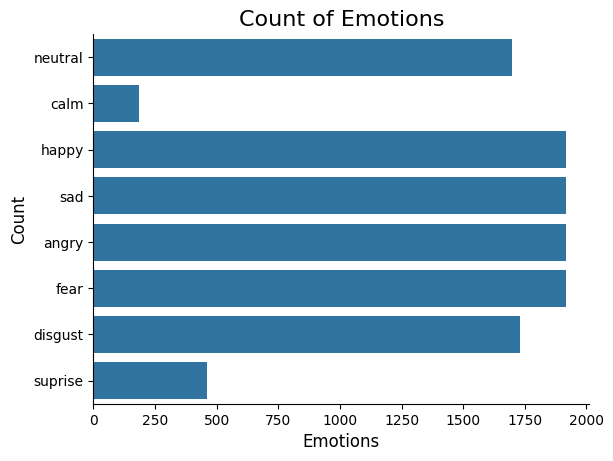

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

**WavePlots**

---
Its will give the loudness of the audio at a given time.

In [14]:
#Creating a function that will create a waveplot
def create_waveplot(data,sr,e):
  plt.figure(figsize=(10,3))
  plt.title(f"Waveplot for audio with {e} emotion ",size=15)
  #this function create a wavelenght of sound or data
  color = 'blue'  # Get the current color  
  librosa.display.waveshow(data, sr=sr,color=color)
  plt.show()

**Spectrograms**

---


Spectrogram is a visual representation of the spectrum of frequencies of sound or other signals as they vary with time. It’s a representation of frequencies changing with respect to time for given audio/music signals.

In [15]:
#Creating a funtion that will create a Spectrogram
def create_spectrogram(data,sr,e):
  #STFT function converts the data into short term fourier transform
  X = librosa.stft(data)
  #"amplitude_to_db" funtion convert the data in decibels(dB)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(12,3))
  plt.title(f"Spectrogram for audio with {e} emotion",size=15)
  librosa.display.specshow(Xdb,sr=sr,x_axis="time", y_axis ="hz")
  # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()

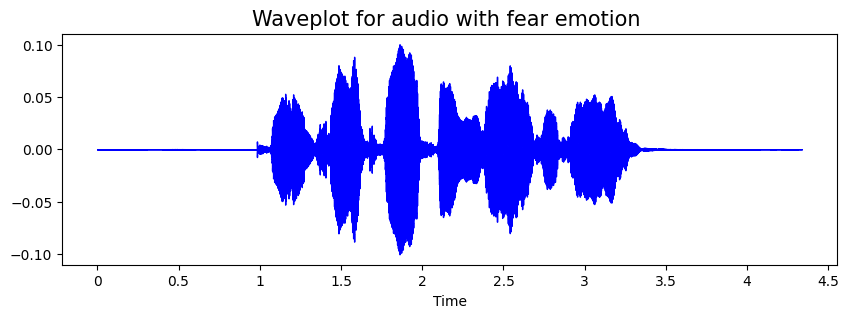

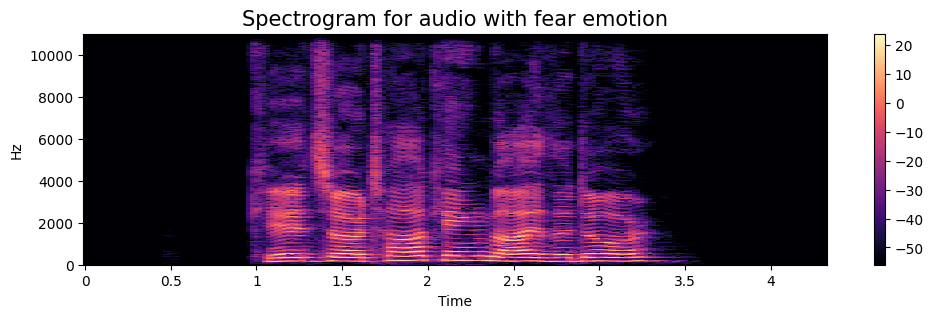

In [16]:
import matplotlib.pyplot as plt
import librosa.display
#Checking the function with fear emotion using waveplot and spectrograms
emotion = 'fear'
path = np.array (data_path.Path[data_path.Emotions == emotion])[1]
data,sampling_rate = librosa.load(path)
create_waveplot(data,sampling_rate,emotion)
create_spectrogram(data,sampling_rate,emotion)
Audio(path)

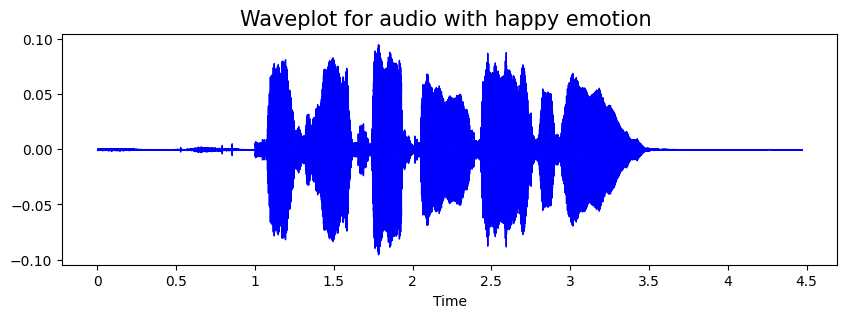

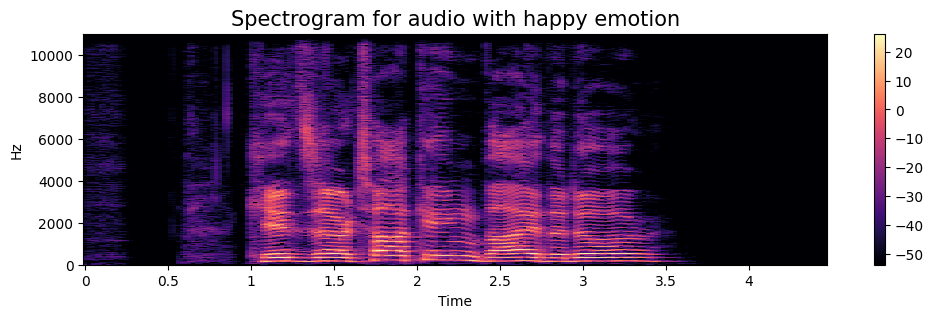

In [17]:
#We will check emotion happy
emotion = 'happy'
path= np.array(data_path.Path[data_path.Emotions == emotion])[1]
data,sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio(path)

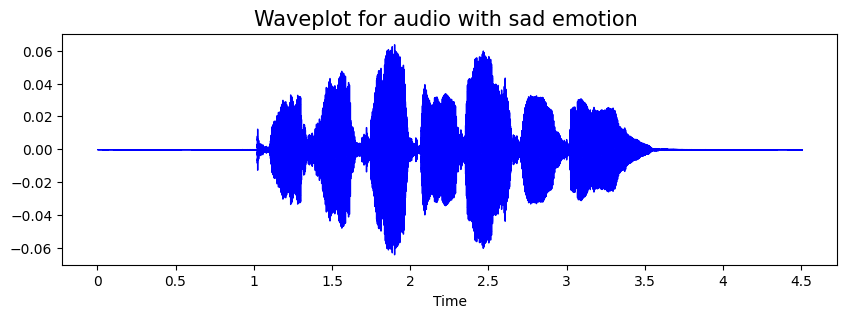

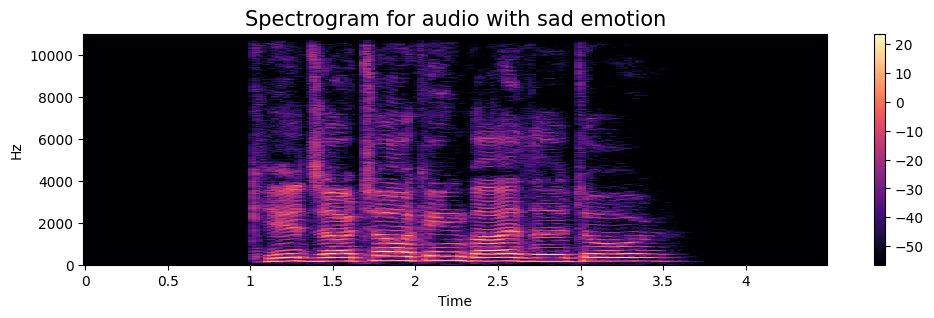

In [18]:
#Now sad emotion
emotion ='sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data,sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio((path))

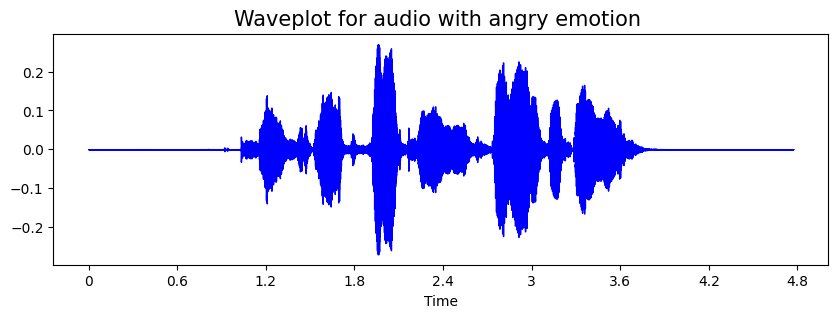

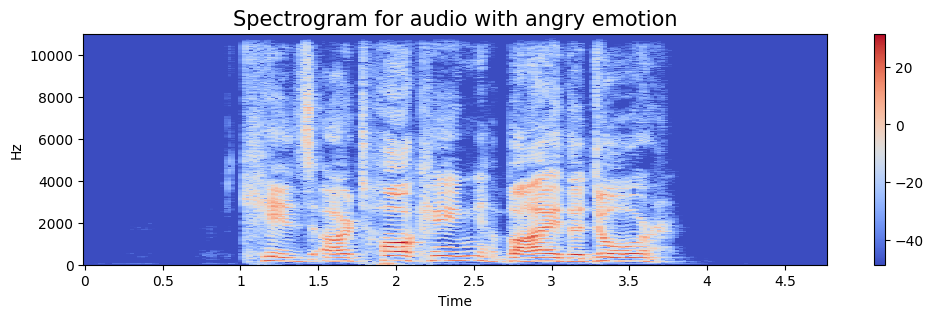

In [19]:
#Now angry emotion
emotion = 'angry'
path=np.array(data_path.Path[data_path.Emotions == emotion])[1]
data,sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio(path)

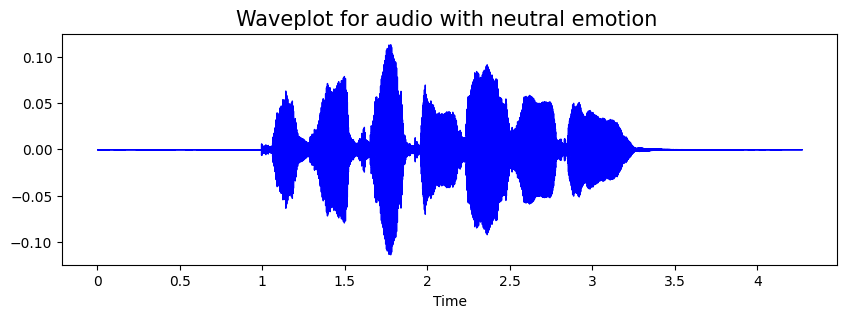

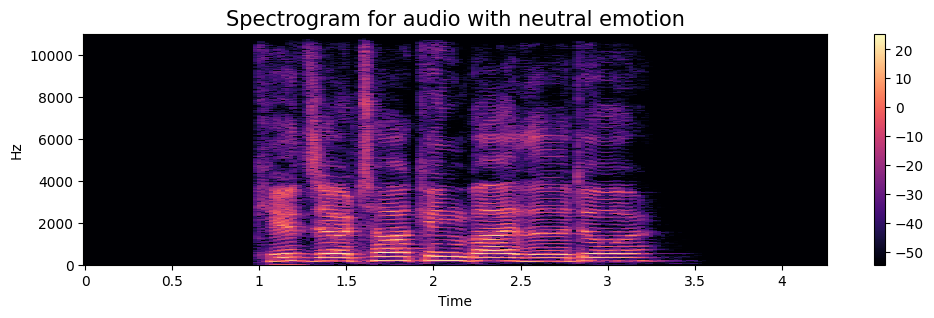

In [20]:
#now neutral emotion
emotion = 'neutral'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data,sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio(path)

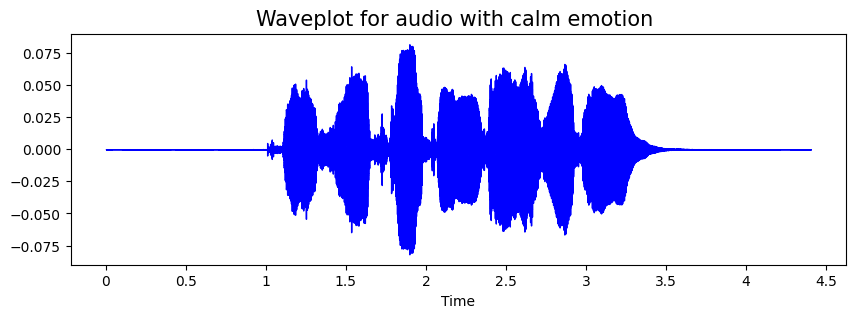

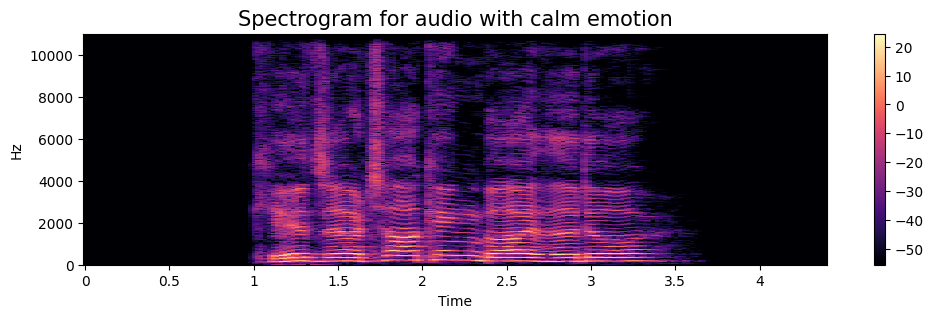

In [21]:
#now calm emotion
emotion = 'calm'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio(path)

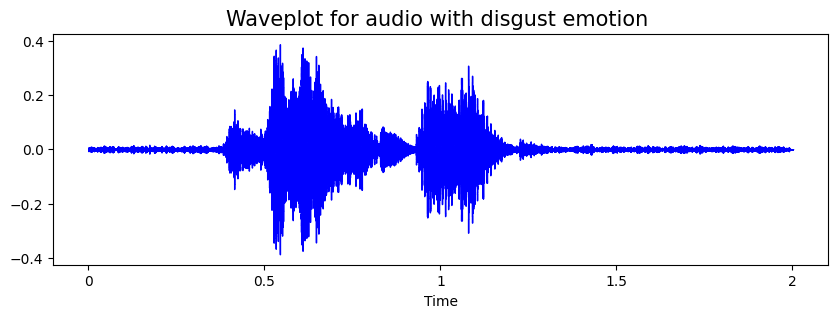

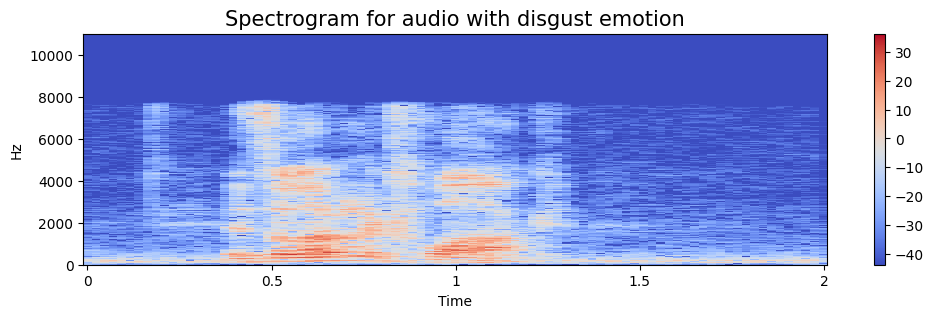

In [22]:
# now disgust emotion
emotion = 'disgust'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_data = librosa.load(path)
create_waveplot(data,sampling_data,emotion)
create_spectrogram(data,sampling_data,emotion)
Audio(path)

## Data Augmentation

---


- Data augmentation is the process by which we create new synthetic data samples by adding small perturbations our initial training set.
-  To generate syntactic data for audio, we can apply noise injection, shifting time, changing pitch and speed.
-   The objective is to make our model invariant to those perturbations and enhance its ability to generalize
-   In order to this work adding the perturbations must conserve the same label as the original training sample.
-   In images data augmention can be performed by shifting the image, zooming, rotating ....

First, let's check which augmentation techniques works better for our dataset.

In [23]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

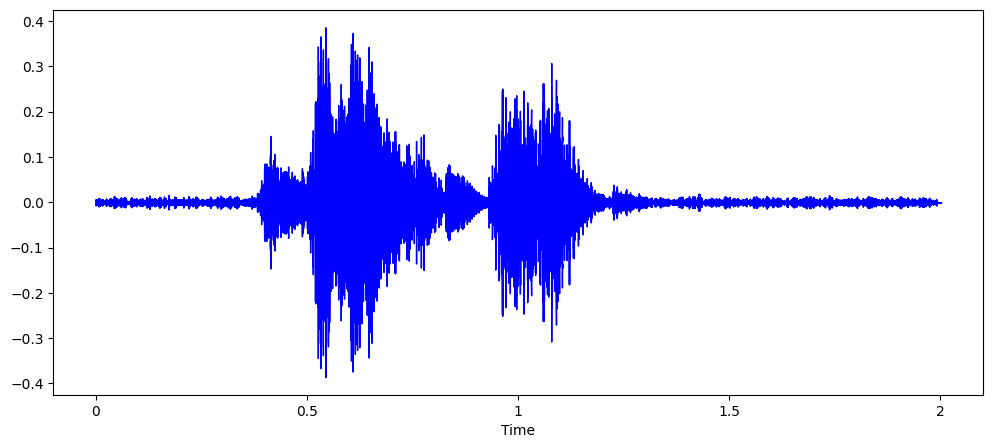

In [24]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sampling_data,color = 'blue')
ipd.Audio(data,rate=sampling_data)

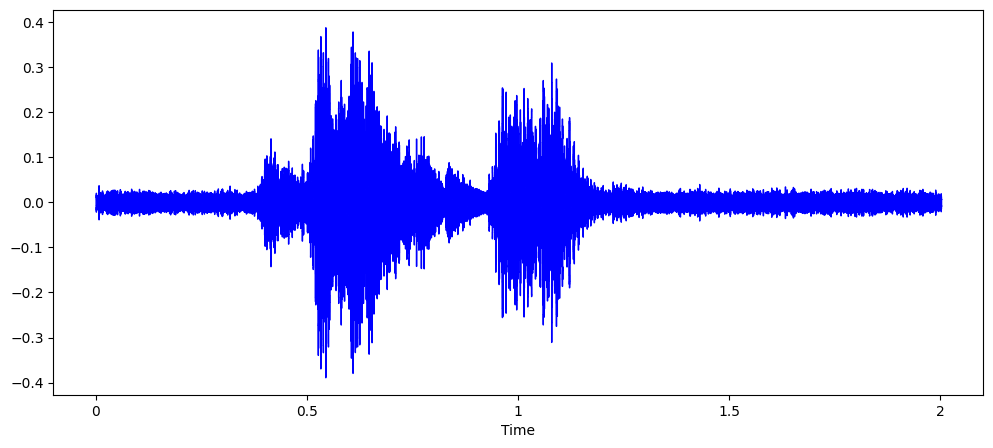

In [25]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sampling_data,color='blue')
ipd.Audio(x, rate=sampling_data)

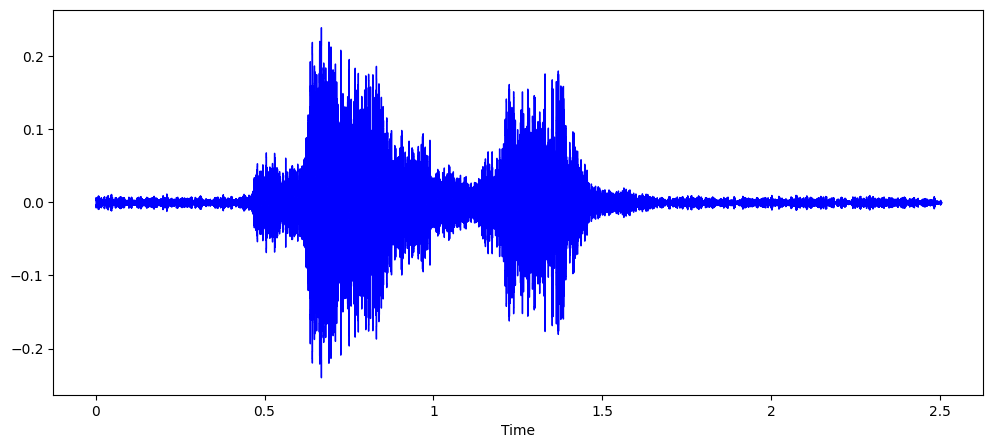

In [26]:
# STRETCHED AUDIO
x = librosa.effects.time_stretch(data,rate=0.8)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sampling_data,color='blue')
ipd.Audio(x, rate=sampling_data)

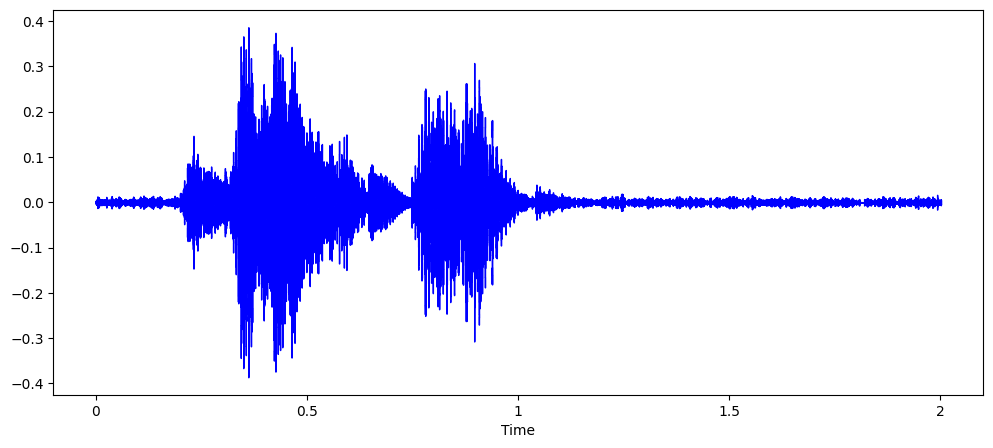

In [27]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sampling_data,color='blue')
ipd.Audio(x, rate=sampling_data)

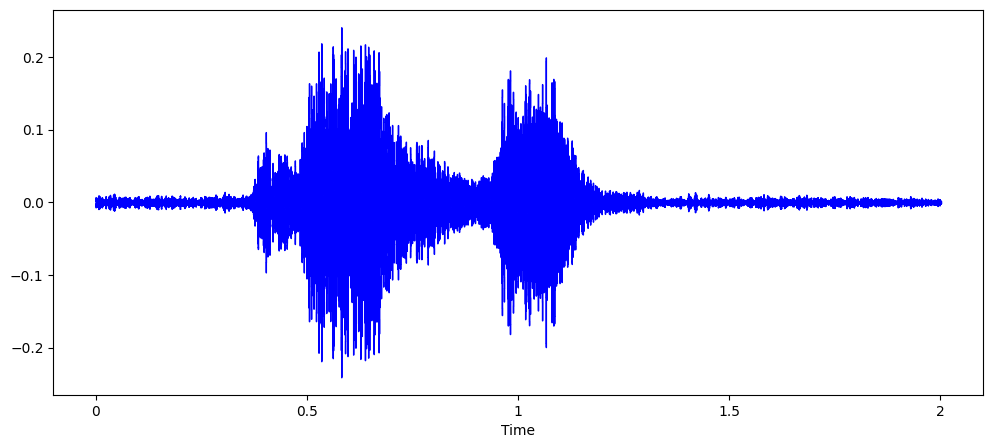

In [28]:
# AUDIO WITH PITCH
x = librosa.effects.pitch_shift(data,sr=sampling_data,n_steps=0.7)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sampling_data,color='blue')
ipd.Audio(x, rate=sampling_data)

### Feature Extraction-
    Extraction of feature is very important part of analysis and finding relations between deffrent things.As we already know that the data provided of audio cannot be understood by the models directly so we need to covert them into an understandable format for which feature extraction is used.
There are many extraction process avaliable but we are going to use :-

- Zero Crossing Rate
- Root Mean Square Error(rmse)
- Mel-frequency cepstral coefficients (MFCC)

In [29]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=librosa.effects.pitch_shift(data,sr=sr,n_steps=0.7)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=librosa.effects.pitch_shift(data,sr=sr,n_steps=0.7)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [30]:
#To calculate the number of processor available
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


## Getting Feature Extraction
So, here are are processing every audio from the dataset. We are performing this to extract every informatio from the audio we can get. So as you can see, every data is processing and then save on the csv file later.<br>
These *data* is going to process form training the model.

In [42]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%500==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)

2it [00:00,  6.09it/s]

0 audio has been processed


503it [01:17, 11.99it/s]

500 audio has been processed


1002it [01:59, 12.19it/s]

1000 audio has been processed


1502it [02:35, 13.66it/s]

1500 audio has been processed


2004it [03:10, 18.16it/s]

2000 audio has been processed


2503it [03:41, 16.80it/s]

2500 audio has been processed


3002it [04:15, 14.07it/s]

3000 audio has been processed


3502it [04:48, 14.54it/s]

3500 audio has been processed


4002it [05:21, 13.34it/s]

4000 audio has been processed


4503it [05:55, 15.03it/s]

4500 audio has been processed


5003it [06:29, 13.98it/s]

5000 audio has been processed


5503it [07:01, 14.60it/s]

5500 audio has been processed


6003it [07:35, 16.52it/s]

6000 audio has been processed


6503it [08:10, 13.67it/s]

6500 audio has been processed


7003it [08:45, 14.73it/s]

7000 audio has been processed


7503it [09:21, 12.34it/s]

7500 audio has been processed


8002it [09:58, 14.73it/s]

8000 audio has been processed


8502it [10:35, 20.13it/s]

8500 audio has been processed


9002it [11:03, 21.35it/s]

9000 audio has been processed


9502it [11:31, 16.81it/s]

9500 audio has been processed


10002it [12:04, 15.84it/s]

10000 audio has been processed


10503it [12:34, 16.98it/s]

10500 audio has been processed


11003it [13:04, 17.23it/s]

11000 audio has been processed


11503it [13:43, 11.48it/s]

11500 audio has been processed


11734it [14:02, 13.92it/s]

Done
Time:  842.6511286000004


In [43]:
len(X), len(Y), data_path.Path.shape

(46936, 46936, (11734,))

## Saving this Feature

In [44]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

0         1         2         3         4         5         6  \
0  0.103027  0.179199  0.259766  0.293457  0.445312  0.556641  0.702148   
1  0.250488  0.385254  0.517090  0.525879  0.511719  0.506348  0.496094   
2  0.331543  0.411621  0.462891  0.351074  0.254883  0.237305  0.283203   
3  0.250000  0.375000  0.500977  0.501465  0.497070  0.495117  0.498047   
4  0.297363  0.524902  0.687012  0.795898  0.813965  0.786621  0.838379   

          7         8         9  ...      2367      2368       2369      2370  \
0  0.768555  0.799316  0.717285  ...  4.051853  4.350368  -3.825604  2.046999   
1  0.493164  0.506348  0.512695  ...  3.731943  4.484235  -3.630797  2.496684   
2  0.331543  0.385254  0.436523  ... -2.710117  5.218730  -7.262068 -1.430390   
3  0.508789  0.517090  0.522461  ... -1.320455  0.271293  -2.049767 -3.461033   
4  0.863770  0.681641  0.526367  ... -1.376670  8.685966 -14.599182 -5.361103   

       2371       2372       2373       2374       2375  Emotions  
0  5.792440  -5.375685 -12.190454  -8.898372 -11.084828   neutral  
1  6.136036  -6.091569 -12.489741  -8.702454 -10.639272   neutral  
2  3.670298  -9.925842 -12.090807 -13.094269 -17.981697   neutral  
3  1.515273  -2.739010 -10.401685 -20.562975 -17.378076   neutral  
4  0.064008 -11.945412 -12.428192   4.370195  -9.535906   neutral  

[5 rows x 2377 columns]

In [5]:
#Reading data from the cav file 
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

0         1         2         3         4         5         6  \
0  0.103027  0.179199  0.259766  0.293457  0.445312  0.556641  0.702148   
1  0.255371  0.379395  0.501953  0.508301  0.516113  0.516113  0.521973   
2  0.331543  0.411621  0.462891  0.351074  0.254883  0.237305  0.283203   
3  0.256348  0.377930  0.496582  0.479004  0.471680  0.479004  0.486328   
4  0.297363  0.524902  0.687012  0.795898  0.813965  0.786621  0.838379   

          7         8         9  ...      2367      2368       2369      2370  \
0  0.768555  0.799316  0.717285  ...  4.051853  4.350368  -3.825604  2.046999   
1  0.512207  0.493652  0.502930  ...  3.954926  1.879044  -1.725873  1.567235   
2  0.331543  0.385254  0.436523  ... -2.710117  5.218730  -7.262068 -1.430390   
3  0.489258  0.500488  0.495605  ... -3.200484  5.141635  -7.113872 -1.439078   
4  0.863770  0.681641  0.526367  ... -1.376670  8.685966 -14.599182 -5.361103   

       2371       2372       2373       2374       2375  Emotions  
0  5.792440  -5.375685 -12.190454  -8.898372 -11.084828   neutral  
1  4.411835  -3.950010  -7.904026 -11.801103 -11.280850   neutral  
2  3.670298  -9.925842 -12.090807 -13.094269 -17.981697   neutral  
3  3.903578 -10.340068 -11.872551 -13.318330 -17.785477   neutral  
4  0.064008 -11.945412 -12.428192   4.370195  -9.535906   neutral  

[5 rows x 2377 columns]

In [6]:
#Checking for missing data from the database
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [7]:
#In this we filling the the place if there is any empty data in csv file
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(46936, 2377)

In [8]:
#Its taking the sum of whose data is missing.
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

## Data Prepration

In [9]:
#Here as you can se we are selecting all the columns from the database in X and we selecting Emotions in Y 
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [10]:
#We are performing Encoder in Y so that all the data which is in words change to numerical data. As emotion are store in as they are express ("Fear,angry,.....,calm") so it is encoding that.
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [11]:
#Now we arw checking the shape of both X and Y .
print(Y.shape)
X.shape

(46936, 7)


(46936, 2376)

In [12]:
#Now spliting the data for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37548, 2376), (37548, 7), (9388, 2376), (9388, 7))

In [13]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [14]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((37548, 2376), (37548, 7), (9388, 2376), (9388, 7))

In [15]:
#Some more Libraries 
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

 **Applying for early stopping** 

In [16]:
#Here we are setting 'ModelCheckpoint' this saves the best model weights based on a monitored metric during training, which is validation accuracy in this case. 
#Already form
# from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau

# model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [31]:
#Here EarlyStopping -This function used to stop training when a monitored metric has stopped improving.
#ReduceLROnPlateau - This function used to stop reduce the learning rate when a metric has stopped improving.
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [17]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((37548, 2376, 1), (37548, 7), (9388, 2376, 1), (9388, 7))

## CNN Model
        A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data. 
Neural Networks are used in various datasets like images, audio, and text.<br>
    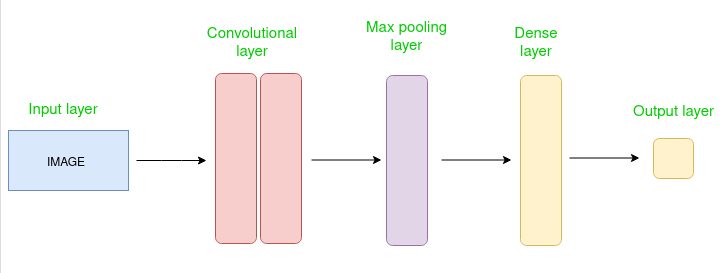

In [40]:
import tensorflow.keras.layers as L
import tensorflow as tf

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer
    
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer
    
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2376, 512)           │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2376, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1188, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1188, 512)           │       1,311,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1188, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 594, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 594, 256)            │         655,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 594, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 297, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 297, 256)            │         196,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 297, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 149, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 149, 128)            │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 149, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │              

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

## Model Working
Here we are training model and Extracting data using CNN model 

In [17]:
from keras.callbacks import EarlyStopping

# Define your EarlyStopping callback with mode='max'
early_stop = EarlyStopping(monitor='val_acc', mode='max', patience=10, verbose=1)

# Rest of your code
history = model.fit(x_traincnn, y_train, epochs=50, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop, lr_reduction, model_checkpoint])


Epoch 1/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1959s 3s/step - accuracy: 0.4027 - loss: 1.6378 - val_accuracy: 0.4743 - val_loss: 1.2945 - learning_rate: 0.0010
Epoch 2/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1961s 3s/step - accuracy: 0.5679 - loss: 1.1042 - val_accuracy: 0.5755 - val_loss: 1.1099 - learning_rate: 0.0010
Epoch 3/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1977s 3s/step - accuracy: 0.6279 - loss: 0.9633 - val_accuracy: 0.5966 - val_loss: 1.0532 - learning_rate: 0.0010
Epoch 4/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1964s 3s/step - accuracy: 0.6708 - loss: 0.8529 - val_accuracy: 0.6375 - val_loss: 0.9335 - learning_rate: 0.0010
Epoch 5/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1971s 3s/step - accuracy: 0.7145 - loss: 0.7555 - val_accuracy: 0.6839 - val_loss: 0.8169 - learning_rate: 0.0010
Epoch 6/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1941s 3s/step - accuracy: 0.7660 - loss: 0.6307 - val_accuracy: 0.6765 - val_loss: 0.8626 - learning_rate: 0.0010
Epoch 7/50
587/587 ━━━━━━━━━━━━━━━━━━━━ 1942s 3s/step - accuracy: 0.8166 - l

Here, we are running all the epoch (times model run for training data) to form a graph of *Training Loss* and *Testing Loss*

294/294 ━━━━━━━━━━━━━━━━━━━━ 103s 351ms/step - accuracy: 0.9720 - loss: 0.1050
Accuracy of our model on test data :  97.08138108253479 %


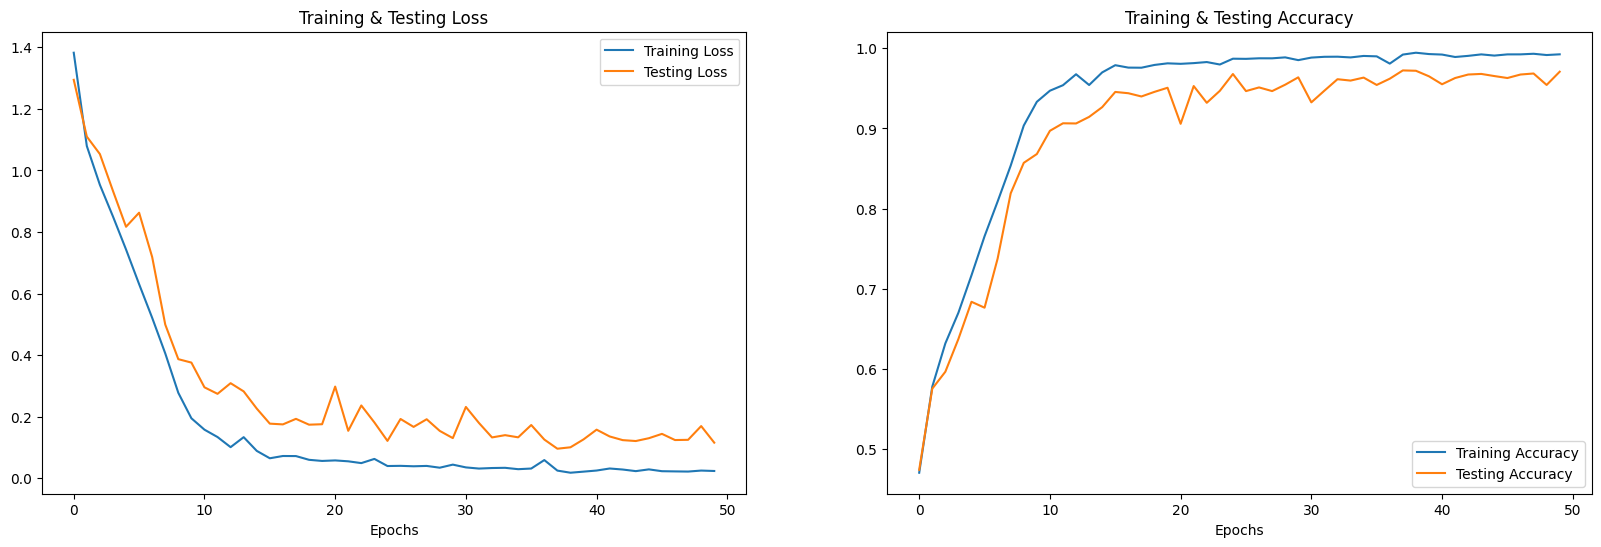

In [18]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

As, you can see now we are performing inverse transformation to convert the data back to original form. Now we compair both actual data and predicted data.

In [27]:
#predicting on test data.
pred_test0 = loaded_model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

#Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

294/294 ━━━━━━━━━━━━━━━━━━━━ 122s 413ms/step


Predicted Labels Actual Labels
0            angry         angry
1          neutral       neutral
2          disgust       disgust
3              sad           sad
4          disgust       disgust
5          disgust       disgust
6              sad           sad
7         surprise      surprise
8             fear          fear
9          neutral       neutral

In [28]:
df0


Predicted Labels Actual Labels
0               angry         angry
1             neutral       neutral
2             disgust       disgust
3                 sad           sad
4             disgust       disgust
...               ...           ...
9383             fear          fear
9384            angry         angry
9385             fear          fear
9386          disgust       disgust
9387          disgust       disgust

[9388 rows x 2 columns]

## Confusion Matrix
        A confusion matrix is a table that is used to define the performance of a classification algorithm.

So, as you can see here is confusion matrix.

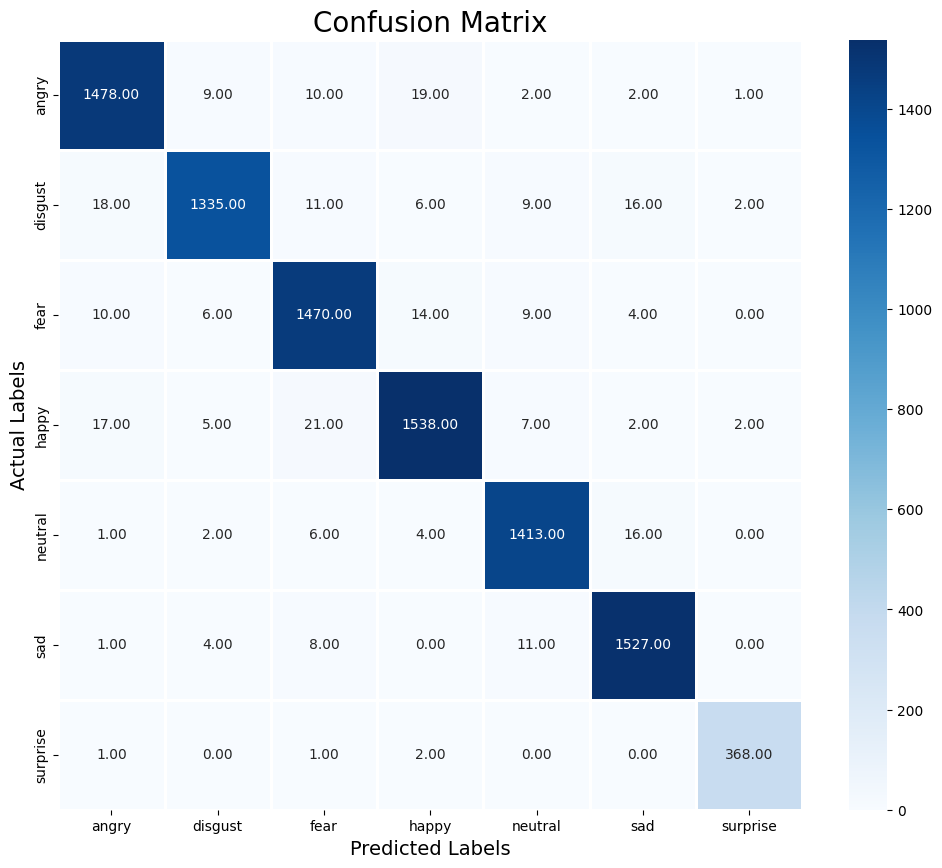

              precision    recall  f1-score   support

       angry       0.97      0.97      0.97      1521
     disgust       0.98      0.96      0.97      1397
        fear       0.96      0.97      0.97      1513
       happy       0.97      0.97      0.97      1592
     neutral       0.97      0.98      0.98      1442
         sad       0.97      0.98      0.98      1551
    surprise       0.99      0.99      0.99       372

    accuracy                           0.97      9388
   macro avg       0.97      0.97      0.97      9388
weighted avg       0.97      0.97      0.97      9388



In [29]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

# Preserving Model 
Here, we are preserving the model using json and pickle to store the model.

In [54]:
#Model is already made and not needed to make file again
# import os
# import keras

# # Save the model architecture as JSON
# model_json = model.to_json()
# with open("CNN_model_architecture.json", "w") as json_file:
#     json_file.write(model_json)

# # Save the model weights
# model.save_weights("CNN_model_weights.weights.h5")
# print("Saved model weights to disk")


Saved model weights to disk


In [18]:
#Here we are loading the data...
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('D:/Imp Files/Jupyter nootbook/Model/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("D:/Imp Files/Jupyter nootbook/Model/CNN_model_weights.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
from keras.models import load_model

# Load your pre-trained Keras model
model = load_model('D:/Imp Files/Jupyter nootbook/Model/CNN_model_weights.weights.h5')

# Load your data into memory
x_data = np.load('D:/Imp Files/Jupyter nootbook/Model/best_model1_weights.keras')

print(predictions)
# print(evaluation)


In [19]:
#Looking to the model and run the model for understanding 
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

294/294 ━━━━━━━━━━━━━━━━━━━━ 120s 406ms/step - accuracy: 0.9718 - loss: 0.0957
compile_metrics: 97.24%


In [20]:
#Here we are making scaler and encoder for encoding 
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")

Done


In [21]:
#getting that data extracted 
import pickle

with open('D:/Imp Files/Jupyter nootbook/Model/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
    
with open('D:/Imp Files/Jupyter nootbook/Model/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")  

Done


In [22]:
#Here we are extracting the data for making extract feature again

import librosa
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(y=data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y=data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [23]:
#Here is prediction model. This fuction and extract feature of the audio
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)
    
    return final_result


In [24]:
#Here we are providing it a data
address = "D:/Imp Files/Jupyter nootbook/03-02-06-02-02-01-22.wav"
res=get_predict_feat(address)
print(res.shape)

(1, 2376, 1)


In [25]:
#This is main prediction function. This take extract feature data and then do prediction 
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    return y_pred[0][0]


In [26]:
prediction(address)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


'fear'